### Import Cancer Data

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Baseline Decision Tree (no restrictions)

Baseline Accuracy: 0.9473684210526315


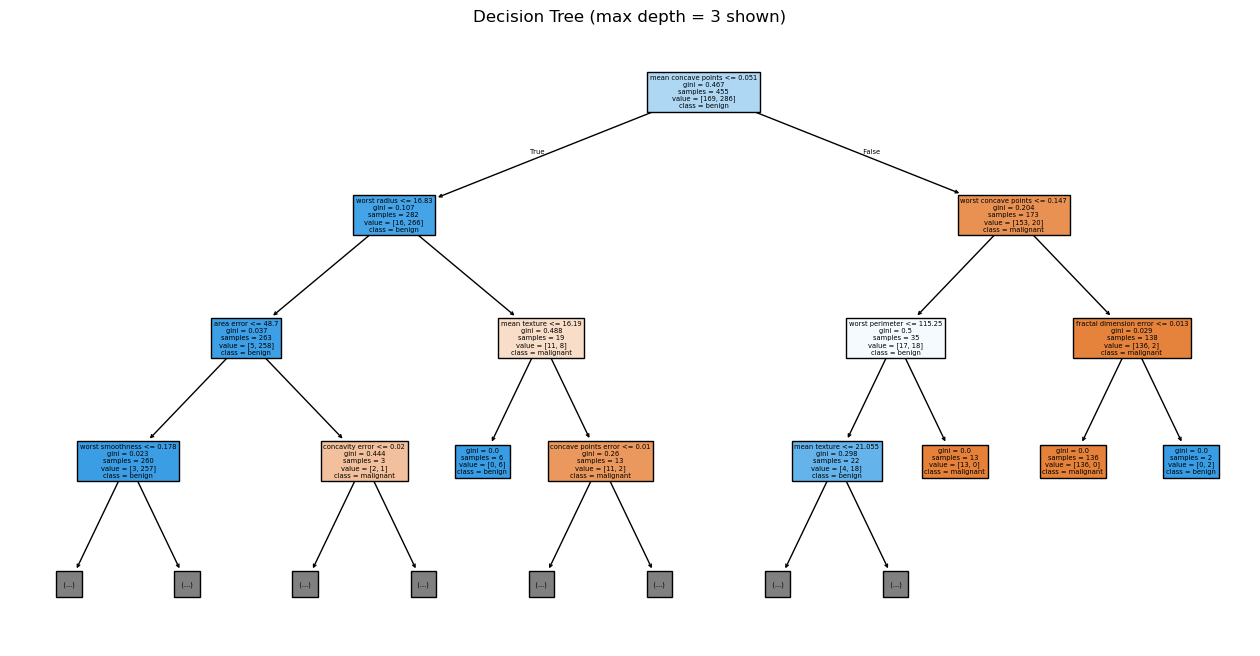

In [5]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred))

# Visualize
plt.figure(figsize=(16, 8))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=target_names, max_depth=3)
plt.title("Decision Tree (max depth = 3 shown)")
plt.show()

### 2. Controlling Overfitting

#### Using max_depth

In [7]:
clf_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_depth.fit(X_train, y_train)
print("Max Depth=3 Accuracy:", accuracy_score(y_test, clf_depth.predict(X_test)))

Max Depth=3 Accuracy: 0.9473684210526315


#### Using min_samples_split

In [9]:
clf_min_split = DecisionTreeClassifier(min_samples_split=30, random_state=42)
clf_min_split.fit(X_train, y_train)
print("Min Samples Split=30 Accuracy:", accuracy_score(y_test, clf_min_split.predict(X_test)))

Min Samples Split=30 Accuracy: 0.9385964912280702


#### Comparing criterion: "gini" vs "entropy"

In [11]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

print("Gini Accuracy:", accuracy_score(y_test, clf_gini.predict(X_test)))
print("Entropy Accuracy:", accuracy_score(y_test, clf_entropy.predict(X_test)))

Gini Accuracy: 0.9473684210526315
Entropy Accuracy: 0.956140350877193
